In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [20]:
df = pd.read_csv("resources/Cleaned-Data.csv")
df

,Fiebre,Cansancio,Tos seca,Dificultad para respirar,Garganta irritada,Ningún síntoma,Dolores,Congestión nasal,Goteo nasal,Diarrea,...,Sexo_Masculino,Sexo_Transgénero,Gravedad_Meve,Gravedad_Moderada,Gravedad_Ninguna,Gravedad_Severa,Contacto_No_Sabe,Contacto_No,Contacto_Sí,Pais
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [21]:
null = df.isnull().sum()
df.columns

Index(['Fiebre', 'Cansancio', 'Tos seca', 'Dificultad para respirar',
       'Garganta irritada', 'Ningún síntoma', 'Dolores', 'Congestión nasal',
       'Goteo nasal', 'Diarrea', 'Ninguna experiencia', 'Age_0-9',
       'Edad_10-19', 'Edad_20-24', 'Edad_25-59', 'Edad_60+', 'Sexo_Femenino',
       'Sexo_Masculino', 'Sexo_Transgénero', 'Gravedad_Meve',
       'Gravedad_Moderada', 'Gravedad_Ninguna', 'Gravedad_Severa',
       'Contacto_No_Sabe', 'Contacto_No', 'Contacto_Sí', 'Pais'],
      dtype='object')

In [22]:
df.drop(['Contacto_No_Sabe', 'Contacto_No', 'Contacto_Sí', 'Pais', 'Gravedad_Meve', 'Gravedad_Moderada', 'Gravedad_Ninguna',
        'Ninguna experiencia', 'Age_0-9',  'Edad_10-19', 'Edad_20-24', 'Edad_25-59', 'Sexo_Femenino',
       'Sexo_Masculino', 'Sexo_Transgénero', 'Ningún síntoma'], axis = 1, inplace = True)
df

,Fiebre,Cansancio,Tos seca,Dificultad para respirar,Garganta irritada,Dolores,Congestión nasal,Goteo nasal,Diarrea,Edad_60+,Gravedad_Severa
0,1,1,1,1,1,1,1,1,1,0,0
1,1,1,1,1,1,1,1,1,1,0,0
2,1,1,1,1,1,1,1,1,1,0,0
3,1,1,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,1,1
316796,0,0,0,0,0,0,0,0,0,1,1
316797,0,0,0,0,0,0,0,0,0,1,0
316798,0,0,0,0,0,0,0,0,0,1,0


array([[<AxesSubplot:title={'center':'Fiebre'}>,
        <AxesSubplot:title={'center':'Cansancio'}>,
        <AxesSubplot:title={'center':'Tos seca'}>],
       [<AxesSubplot:title={'center':'Dificultad para respirar'}>,
        <AxesSubplot:title={'center':'Garganta irritada'}>,
        <AxesSubplot:title={'center':'Dolores'}>],
       [<AxesSubplot:title={'center':'Congestión nasal'}>,
        <AxesSubplot:title={'center':'Goteo nasal'}>,
        <AxesSubplot:title={'center':'Diarrea'}>],
       [<AxesSubplot:title={'center':'Edad_60+'}>,
        <AxesSubplot:title={'center':'Gravedad_Severa'}>, <AxesSubplot:>]],
      dtype=object)

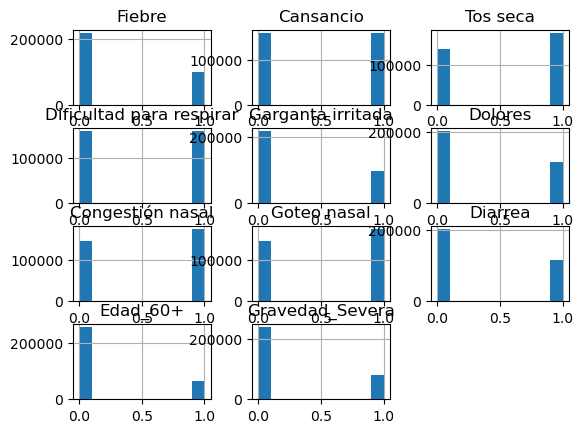

In [23]:
df.hist()

In [24]:
train, test = train_test_split(df, test_size = 0.3, random_state=0)
pred = test.copy()
x_train = train.iloc[:, :19].values
x_test = test.iloc[:, :19].values

In [25]:
y_train = train.iloc[:, -1].values
y_test = test.iloc[:, -1].values

In [26]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred_knn = model_knn.predict(x_test)

In [28]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred), '\n')
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    cm.plot()

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[71256     0]
 [    0 23784]] 



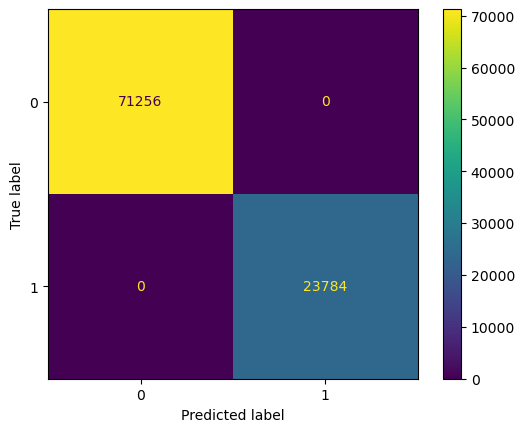

In [29]:
perform(y_pred_knn)